In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
%load_ext autoreload
%autoreload 2
from preprocessing import *

/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [7]:
df = pd.read_csv("spectral_clustering_all_hard_obj.csv")

In [11]:
objid = 1

In [12]:
bb_objects = bb_info[bb_info["object_id"] == objid]

In [25]:
worker_ids

array([ 75, 114, 116, 118, 133, 140, 131, 148, 137, 149, 156,  52, 159,
       175, 181, 182, 187, 170, 169, 184, 199, 201, 196, 208, 223, 219,
       238, 246, 239, 247, 248])

In [28]:
bb_objects = bb_info[(bb_info["object_id"] == objid)&(bb_info["worker_id"].isin(worker_ids))]

In [43]:
from initPixelAnalysis import *

IndentationError: expected an indented block (PixelEM.py, line 25)

In [44]:
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]
from sample_worker_seeds import sample_specs
sample_lst = sample_specs.keys()
print "3.Creating megamask (aggregated mask over all workers in that sample) for all sample-objects [mega_mask.pkl, voted_workers_mask.pkl]"
print "This might take a while (~2hrs)"
for sample in sample_lst:
    for objid in object_lst:
        cluster_ids = df[(df["objid"]==objid)].cluster.unique()
        for cluster_id in cluster_ids:
            worker_ids = np.array(df[(df["objid"]==objid)&(df["cluster"]==0)].wid)
            print sample + ":" + str(objid) +"; clust:" + str(cluster_id)
            create_mega_mask(objid, worker_ids=worker_ids,cluster_id = cluster_id,PLOT=False, sample_name=sample)

3.Creating megamask (aggregated mask over all workers in that sample) for all sample-objects [mega_mask.pkl, voted_workers_mask.pkl]
This might take a while (~2hrs)
25workers_rand0:1; clust:0


NameError: name 'create_mega_mask' is not defined

In [ ]:
create_mega_mask(objid, worker_ids=[],cluster_id="", PLOT=.objid

In [ ]:



        print sample + ":" + str(objid)
        create_mega_mask(objid, PLOT=False, sample_name=sample)

In [ ]:
25workers_rand0:33

In [84]:
img  = pkl.load(open("pixel_em/25workers_rand0/obj7/clust1/voted_workers_mask.pkl"))

In [87]:
img0  = pkl.load(open("pixel_em/25workers_rand0/obj7/clust0/voted_workers_mask.pkl"))

In [104]:
img0[(116,386)]

[129]

In [105]:
img[(116,386)]

0

In [103]:
np.where(img0!=img)

(array([116, 116, 117, ..., 234, 234, 235]),
 array([386, 387, 385, ..., 398, 399, 398]))

In [64]:
from areaMask import *
print "5.Creating area mask for all sample-objects"
print "This will also take a while (~5hrs)"
for sample in tqdm(sample_lst):
    for objid in object_lst:
        cluster_ids = df[(df["objid"]==objid)].cluster.unique()
        for cluster_id in cluster_ids:
            worker_ids = np.array(df[(df["objid"]==objid)&(df["cluster"]==cluster_id)].wid)
            print sample + ":" + str(objid)+"clust"+str(cluster_id)
            create_PixTiles(sample, objid, cluster_id,check_edges=True)

  0%|          | 0/31 [00:00<?, ?it/s]

5.Creating area mask for all sample-objects
This will also take a while (~5hrs)
25workers_rand0:1clust0
25workers_rand0:1clust1
25workers_rand0:4clust0
25workers_rand0:4clust1
25workers_rand0:7clust0
25workers_rand0:7clust1
25workers_rand0:8clust0
25workers_rand0:8clust1
25workers_rand0:8clust2
25workers_rand0:10clust0
25workers_rand0:10clust1
25workers_rand0:15clust0
25workers_rand0:15clust1
25workers_rand0:18clust0
25workers_rand0:18clust1
25workers_rand0:18clust2
25workers_rand0:18clust3
25workers_rand0:20clust0
25workers_rand0:20clust1
25workers_rand0:20clust2
25workers_rand0:20clust3
25workers_rand0:20clust4
25workers_rand0:21clust0
25workers_rand0:21clust1
25workers_rand0:22clust0
25workers_rand0:22clust1
25workers_rand0:22clust2
25workers_rand0:25clust0
25workers_rand0:25clust1
25workers_rand0:26clust0


KeyboardInterrupt: 

In [75]:
def tiles2AreaMask(sample, objid,clustid=""):
    tiles = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))
    mega_mask = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample, objid)))
    tarea = [len(t) for t in tiles]
    mask = np.zeros_like(mega_mask)
    for tidx in range(len(tiles)):
        for i in list(tiles[tidx]):
                mask[i] = tarea[tidx]
    return mask


In [106]:
sample ='25workers_rand0'
objid = 21
cluster_id = 0
tiles = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))

In [107]:
sample ='25workers_rand0'
objid = 21
cluster_id = 1
tiles2 = pkl.load(open("pixel_em/{}/obj{}/clust{}/tiles.pkl".format(sample, objid,cluster_id)))

In [112]:
len(tiles)

303

In [116]:
len(tiles[1])

172

In [113]:
len(tiles2)

3

In [115]:
len(tiles2[1])

1238

In [80]:
mask = tiles2AreaMask('25workers_rand0',21,0)

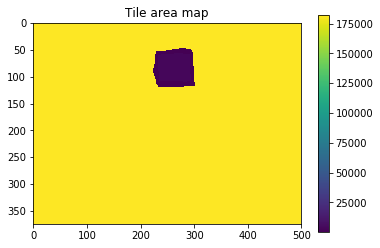

In [81]:
plt.figure()
plt.imshow(mask)
plt.title("Tile area map")
plt.colorbar()

In [82]:
mask = tiles2AreaMask('25workers_rand0',21,1)

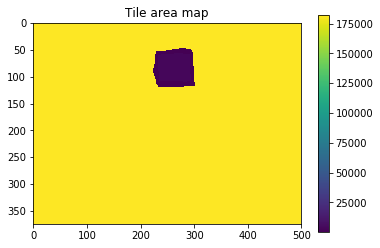

In [83]:
plt.figure()
plt.imshow(mask)
plt.title("Tile area map")
plt.colorbar()

In [67]:
test_sample = sample_lst[0]
print 'Testing tiles2AreaMask for', test_sample
mask = tiles2AreaMask(test_sample, 1)
plt.figure()
plt.imshow(mask)
plt.title("Tile index map")
plt.colorbar()
plt.savefig('testing_tiles2AreaMask.png')
plt.close()

,objid,wid,cluster
470,27,136,0
471,27,3,1
472,27,68,1
473,27,114,1
474,27,120,1
475,27,219,1
476,27,116,1
477,27,118,1
478,27,135,1
479,27,131,1
